In [2]:
# pip install yfinance

## Importing Libraries

In [3]:
import yfinance as yf
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.optimize as sci_opt


import warnings 
warnings.filterwarnings(action= 'ignore')

### Get data of following companies from Yahoo Finance using python API
**Starting from FY17**
* HDFCBANK - HDFC (Banking)
* ICICIBANK - ICICI(Banking)
* TCS - Tata Consultancy Services (IT)
* INFY - Infosys (IT)
* HINDUNILVR - Hindustan Unilever (FMCG)
* ITC - Imperial Tobacco Company of India (FMCG)
* RELIANCE - Reliance Industries (Refineries)
* LT - Larsen and Toubro (Infrastructure)
* ADANIENT - Adani Enterprises (Trading)
* BHARTIARTL - Bharti Airtel (Telecom)
* ^NSE - Nifty 50 index (enchmark index that represents the performance of the 50 largest and most liquid stocks listed on the NSE)

In [4]:
start_date = '2017-04-01'

HDFCBANK = yf.download('HDFCBANK.NS', start=start_date)
ICICIBANK = yf.download('ICICIBANK.NS', start=start_date)
TCS = yf.download('TCS.NS', start=start_date)
INFY = yf.download('INFY.NS', start=start_date)
HINDUNILVR = yf.download('HINDUNILVR.NS', start=start_date)
ITC = yf.download('ITC.NS', start=start_date)
RELIANCE = yf.download('RELIANCE.NS', start=start_date)
LT = yf.download('LT.NS', start=start_date)
ADANIENT = yf.download('ADANIENT.NS', start=start_date)
BHARTIARTL = yf.download('BHARTIARTL.NS', start=start_date)
NSE = yf.download('^NSEI', start=start_date)

NSE

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-04-03,9220.599609,9245.349609,9192.400391,9237.849609,9237.849609,139100
2017-04-05,9264.400391,9273.900391,9215.400391,9265.150391,9265.150391,184800
2017-04-06,9245.799805,9267.950195,9218.849609,9261.950195,9261.950195,186100
2017-04-07,9223.700195,9250.500000,9188.099609,9198.299805,9198.299805,190000
2017-04-10,9225.599609,9225.650391,9174.849609,9181.450195,9181.450195,135800
...,...,...,...,...,...,...
2024-02-16,22020.300781,22068.650391,21968.949219,22040.699219,22040.699219,343900
2024-02-19,22103.449219,22186.650391,22021.050781,22122.250000,22122.250000,0
2024-02-20,22099.199219,22215.599609,22045.849609,22196.949219,22196.949219,295700


### Time Series Plot

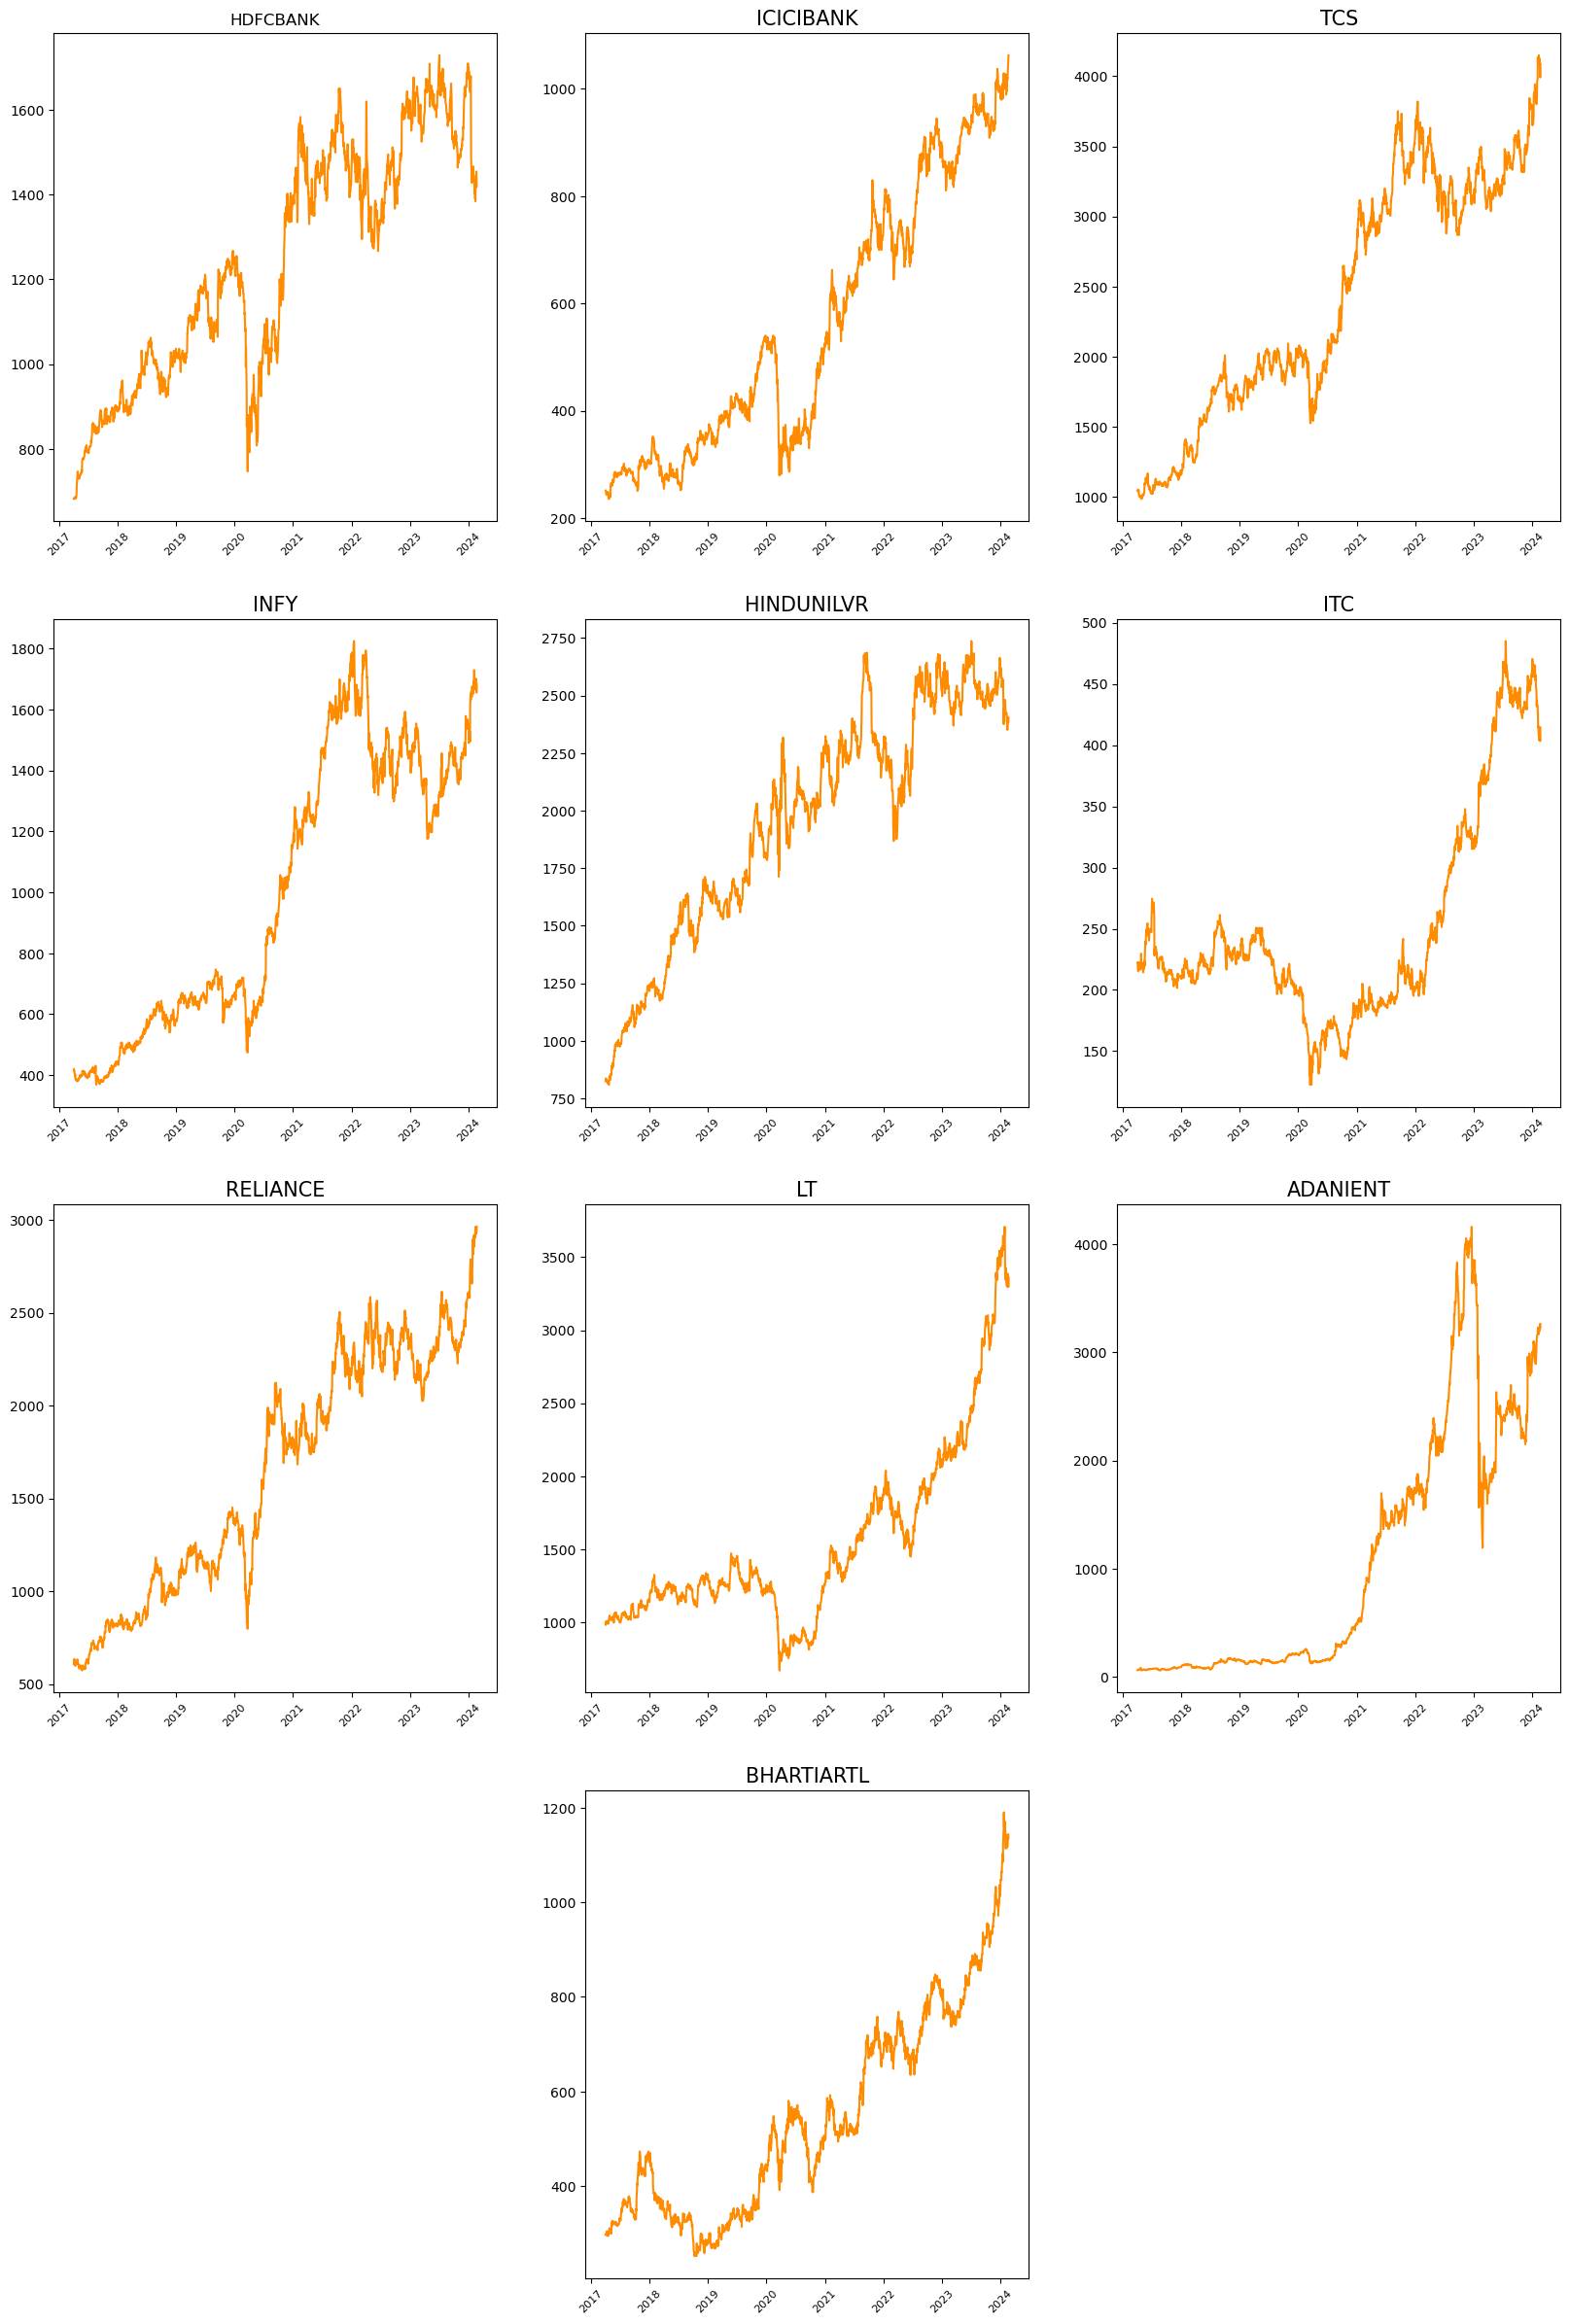

In [5]:
plt.figure(figsize=(20,30))

plt.subplot(4,3,1)
plt.plot(HDFCBANK['Adj Close'], label='HDFCBANK', color='darkorange')
plt.title('HDFCBANK')
plt.xticks(fontsize=8,rotation=45)


plt.subplot(4,3,2)
plt.plot(ICICIBANK['Adj Close'], color='darkorange')
plt.title('ICICIBANK', fontsize=15)
plt.xticks(fontsize=8,rotation=45)

plt.subplot(4,3,3)
plt.plot(TCS['Adj Close'], color='darkorange')
plt.title('TCS', fontsize=15)
plt.xticks(fontsize=8,rotation=45)

plt.subplot(4,3,4)
plt.plot(INFY['Adj Close'], color='darkorange')
plt.title('INFY', fontsize=15)
plt.xticks(fontsize=8,rotation=45)

plt.subplot(4,3,5)
plt.plot(HINDUNILVR['Adj Close'], color='darkorange')
plt.title('HINDUNILVR', fontsize=15)
plt.xticks(fontsize=8,rotation=45)

plt.subplot(4,3,6)
plt.plot(ITC['Adj Close'], color='darkorange')
plt.title('ITC', fontsize=15)
plt.xticks(fontsize=8,rotation=45)

plt.subplot(4,3,7)
plt.plot(RELIANCE['Adj Close'], color='darkorange')
plt.title('RELIANCE', fontsize=15)
plt.xticks(fontsize=8,rotation=45)

plt.subplot(4,3,8)
plt.plot(LT['Adj Close'], color='darkorange')
plt.title('LT', fontsize=15)
plt.xticks(fontsize=8,rotation=45)

plt.subplot(4,3,9)
plt.plot(ADANIENT['Adj Close'], color='darkorange')
plt.title('ADANIENT', fontsize=15)
plt.xticks(fontsize=8,rotation=45)

plt.subplot(4,3,11)
plt.plot(BHARTIARTL['Adj Close'], color='darkorange')
plt.title('BHARTIARTL', fontsize=15)
plt.xticks(fontsize=8,rotation=45)

plt.show()

* Every Stock and downward trend around 2020 other than **Hindustan Uniliver & Airtel** 
* **Adani Enterprise** has sharp rise from 2021


## Risk Management
**It is the process of monitoring and dealing with the financial risks associated with investing. Risk is inseparable from return in the investment world.
One of the tactics to ascertain risk is standard deviation (can understand like Volatility of a stock), which is a statistical measure of dispersion around a central tendency.**

**Investment Risk:** It is the deviation from an expected outcome. This deviation is expressed in absolute terms or relative to something else like a market benchmark.

### Most common risk management techniques.
* **Avoidance:** This means choosing the safest assets with little to no risks.
* **Sharing:** This technique comes with two or more parties taking on an agreed-upon portion of the risk. For instance, **reinsurers** cover risks that insurance companies can't handle on their own.
* **Transferring:** Risks can be passed on from one party to another. For instance, health insurance involves passing on the risk of coverage from you to your insurer as long as you keep up with your premiums.
* **Loss Prevention and Reduction:** Rather than eliminate the potential for risk, this strategy means that you find ways to minimize your losses by preventing them from spreading to other areas. **Diversification** may be a way for investors to reduce their losses.


### Metrics Used for assessing Investment Risk: 
* **BETA:** Beta measures the sensitivity of a stock's returns to changes in the market returns. It indicates how volatile a stock is compared to the overall market.
* **TREYNOR RATIO:** The Treynor ratio measures the risk-adjusted return of an investment by comparing its excess return over the risk-free rate per unit of systematic risk (beta). A higher Treynor ratio indicates better risk-adjusted performance.
* **SHARPE RATIO:** Sharpe ratio evaluate the performance of an investment or a portfolio relative to its risk. It quantifies the excess return of an investment over the risk-free rate per unit of risk (standard deviation of returns)
* **ALPHA:** Alpha measures the excess return of an investment over its expected return, given its beta and the market return. It indicates how well an investment has performed relative to its risk.

In [6]:
HDFCBANK['Return']   =  HDFCBANK['Adj Close'].pct_change().dropna()*100
ICICIBANK['Return']  =  ICICIBANK['Adj Close'].pct_change().dropna()*100
TCS['Return']        =  TCS['Adj Close'].pct_change().dropna()*100
INFY['Return']       =  INFY['Adj Close'].pct_change().dropna()*100
HINDUNILVR['Return'] =  HINDUNILVR['Adj Close'].pct_change().dropna()*100
ITC['Return']        =  ITC['Adj Close'].pct_change().dropna()*100
RELIANCE['Return']   =  RELIANCE['Adj Close'].pct_change().dropna()*100
LT['Return']         =  LT['Adj Close'].pct_change().dropna()*100
ADANIENT['Return']   =  ADANIENT['Adj Close'].pct_change().dropna()*100
BHARTIARTL['Return'] =  BHARTIARTL['Adj Close'].pct_change().dropna()*100
NSE['Return']        =  NSE['Adj Close'].pct_change().dropna()*100

In [7]:
risk_free_rate = 0.05        

In [8]:
NSE_mean_return = NSE['Return'].mean()
NSE_var = NSE['Return'].var()
NSE_std_dev = NSE['Return'].std()

print('Avg_return:' , NSE_mean_return)
print('Variance:' , NSE_var)
print('Std Dev:' , NSE_std_dev)

Avg_return: 0.05768935893046835
Variance: 1.1939057366908592
Std Dev: 1.09265993643533


In [9]:
def calculate_metrics(stock_data, market_data, risk_free_rate):
    mean_return = stock_data['Return'].mean()
    std_dev = stock_data['Return'].std()
    cov = stock_data['Return'].cov(market_data['Return'])
    beta = cov / market_data['Return'].var()
    sharpe_ratio = (mean_return - risk_free_rate) / std_dev
    treynor_ratio = (mean_return - risk_free_rate) / beta
    alpha = mean_return - (risk_free_rate + beta * (market_data['Return'].mean() - risk_free_rate))
    return mean_return, std_dev, cov, beta, sharpe_ratio, treynor_ratio, alpha

In [16]:
HDFCBANK_mean_return, HDFCBANK_std_dev, HDFCBANK_cov, HDFCBANK_beta, HDFCBANK_sharpe_ratio, HDFCBANK_treynor_ratio, HDFCBANK_alpha = calculate_metrics(HDFCBANK, NSE, risk_free_rate)

ICICIBANK_mean_return, ICICIBANK_std_dev, ICICIBANK_cov, ICICIBANK_beta, ICICIBANK_sharpe_ratio, ICICIBANK_treynor_ratio, ICICIBANK_alpha = calculate_metrics(ICICIBANK, NSE, risk_free_rate)

TCS_mean_return, TCS_std_dev, TCS_cov, TCS_beta, TCS_sharpe_ratio, TCS_treynor_ratio, TCS_alpha = calculate_metrics(TCS, NSE, risk_free_rate)

INFY_mean_return, INFY_std_dev, INFY_cov, INFY_beta, INFY_sharpe_ratio, INFY_treynor_ratio, INFY_alpha = calculate_metrics(INFY, NSE, risk_free_rate)

HINDUNILVR_mean_return, HINDUNILVR_std_dev, HINDUNILVR_cov, HINDUNILVR_beta, HINDUNILVR_sharpe_ratio, HINDUNILVR_treynor_ratio, HINDUNILVR_alpha = calculate_metrics(HINDUNILVR, NSE, risk_free_rate)

ITC_mean_return, ITC_std_dev, ITC_cov, ITC_beta, ITC_sharpe_ratio, ITC_treynor_ratio, ITC_alpha = calculate_metrics(ITC, NSE, risk_free_rate)

RELIANCE_mean_return, RELIANCE_std_dev, RELIANCE_cov, RELIANCE_beta, RELIANCE_sharpe_ratio, RELIANCE_treynor_ratio, RELIANCE_alpha = calculate_metrics(RELIANCE, NSE, risk_free_rate)

LT_mean_return, LT_std_dev, LT_cov, LT_beta, LT_sharpe_ratio, LT_treynor_ratio, LT_alpha = calculate_metrics(LT, NSE, risk_free_rate)

ADANIENT_mean_return, ADANIENT_std_dev, ADANIENT_cov, ADANIENT_beta, ADANIENT_sharpe_ratio, ADANIENT_treynor_ratio, ADANIENT_alpha = calculate_metrics(ADANIENT, NSE, risk_free_rate)

BHARTIARTL_mean_return, BHARTIARTL_std_dev, BHARTIARTL_cov, BHARTIARTL_beta, BHARTIARTL_sharpe_ratio, BHARTIARTL_treynor_ratio, BHARTIARTL_alpha = calculate_metrics(BHARTIARTL, NSE, risk_free_rate)

In [17]:
return_data = pd.Series([HDFCBANK_mean_return, ICICIBANK_mean_return, TCS_mean_return, INFY_mean_return, HINDUNILVR_mean_return, 
                      ITC_mean_return, RELIANCE_mean_return, LT_mean_return, ADANIENT_mean_return, BHARTIARTL_mean_return], 
                     index=['HDFCBANK', 'ICICIBANK', 'TCS', 'INFY', 'HINDUNILVR', 
                            'ITC', 'RELIANCE', 'LT', 'ADANIENT', 'BHARTIARTL']).sort_values(ascending=False)

In [18]:
std_dev_data = pd.Series([HDFCBANK_std_dev, ICICIBANK_std_dev, TCS_std_dev, INFY_std_dev, HINDUNILVR_std_dev, 
                      ITC_std_dev, RELIANCE_std_dev, LT_std_dev, ADANIENT_std_dev, BHARTIARTL_std_dev], 
                     index=['HDFCBANK', 'ICICIBANK', 'TCS', 'INFY', 'HINDUNILVR', 
                            'ITC', 'RELIANCE', 'LT', 'ADANIENT', 'BHARTIARTL']).sort_values(ascending=False)

In [19]:
beta_data = pd.Series([HDFCBANK_beta, ICICIBANK_beta, TCS_beta, INFY_beta, HINDUNILVR_beta, 
                      ITC_beta, RELIANCE_beta, LT_beta, ADANIENT_beta, BHARTIARTL_beta], 
                     index=['HDFCBANK', 'ICICIBANK', 'TCS', 'INFY', 'HINDUNILVR', 
                            'ITC', 'RELIANCE', 'LT', 'ADANIENT', 'BHARTIARTL']).sort_values(ascending=False)

In [20]:
treynor_ratio_data = pd.Series([HDFCBANK_treynor_ratio, ICICIBANK_treynor_ratio, TCS_treynor_ratio, INFY_treynor_ratio, HINDUNILVR_treynor_ratio, 
                      ITC_treynor_ratio, RELIANCE_treynor_ratio, LT_treynor_ratio, ADANIENT_treynor_ratio, BHARTIARTL_treynor_ratio], 
                     index=['HDFCBANK', 'ICICIBANK', 'TCS', 'INFY', 'HINDUNILVR', 
                            'ITC', 'RELIANCE', 'LT', 'ADANIENT', 'BHARTIARTL']).sort_values(ascending=False)

In [21]:
sharpe_ratio_data = pd.Series([HDFCBANK_sharpe_ratio, ICICIBANK_sharpe_ratio, TCS_sharpe_ratio, INFY_sharpe_ratio, HINDUNILVR_sharpe_ratio, 
                      ITC_sharpe_ratio, RELIANCE_sharpe_ratio, LT_sharpe_ratio, ADANIENT_sharpe_ratio, BHARTIARTL_sharpe_ratio], 
                     index=['HDFCBANK', 'ICICIBANK', 'TCS', 'INFY', 'HINDUNILVR', 
                            'ITC', 'RELIANCE', 'LT', 'ADANIENT', 'BHARTIARTL']).sort_values(ascending=False)

In [22]:
alpha_data = pd.Series([HDFCBANK_alpha, ICICIBANK_alpha, TCS_alpha, INFY_alpha, HINDUNILVR_alpha, 
                      ITC_alpha, RELIANCE_alpha, LT_alpha, ADANIENT_alpha, BHARTIARTL_alpha], 
                     index=['HDFCBANK', 'ICICIBANK', 'TCS', 'INFY', 'HINDUNILVR', 
                            'ITC', 'RELIANCE', 'LT', 'ADANIENT', 'BHARTIARTL']).sort_values(ascending=False)

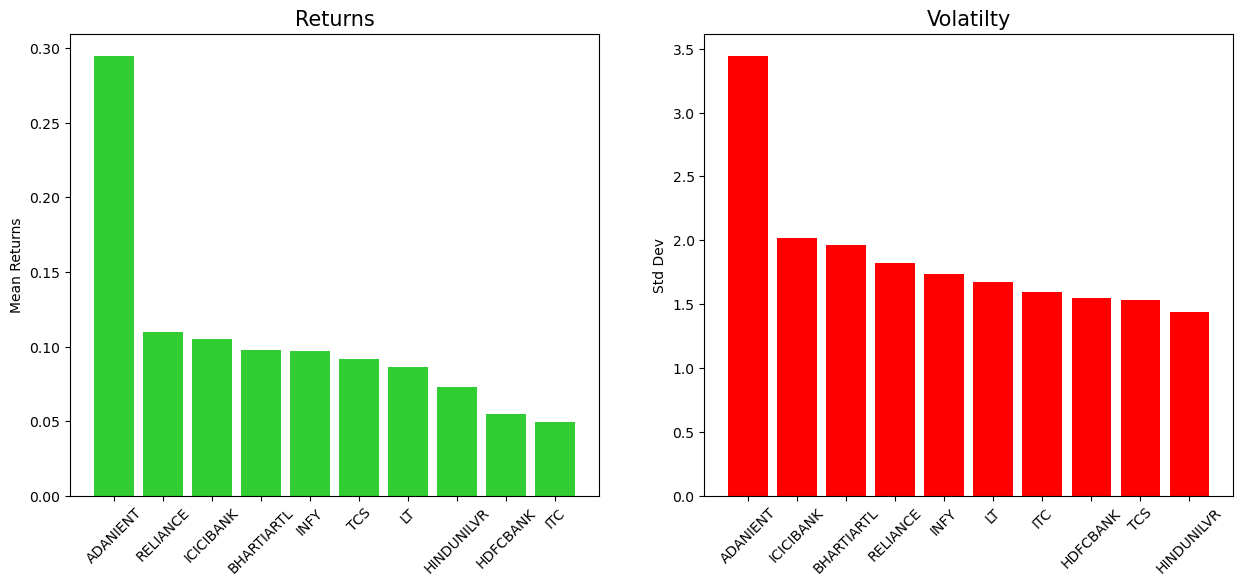

In [23]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.bar(return_data.index, return_data, color='limegreen')
plt.xticks(fontsize=10)
plt.ylabel('Mean Returns')
plt.title('Returns', fontsize=15)
plt.xticks(rotation=45)

plt.subplot(1,2,2)
plt.bar(std_dev_data.index, std_dev_data, color='red')
plt.xticks(fontsize=10)
plt.ylabel('Std Dev')
plt.title('Volatilty', fontsize=15)
plt.xticks(rotation=45)

plt.show()

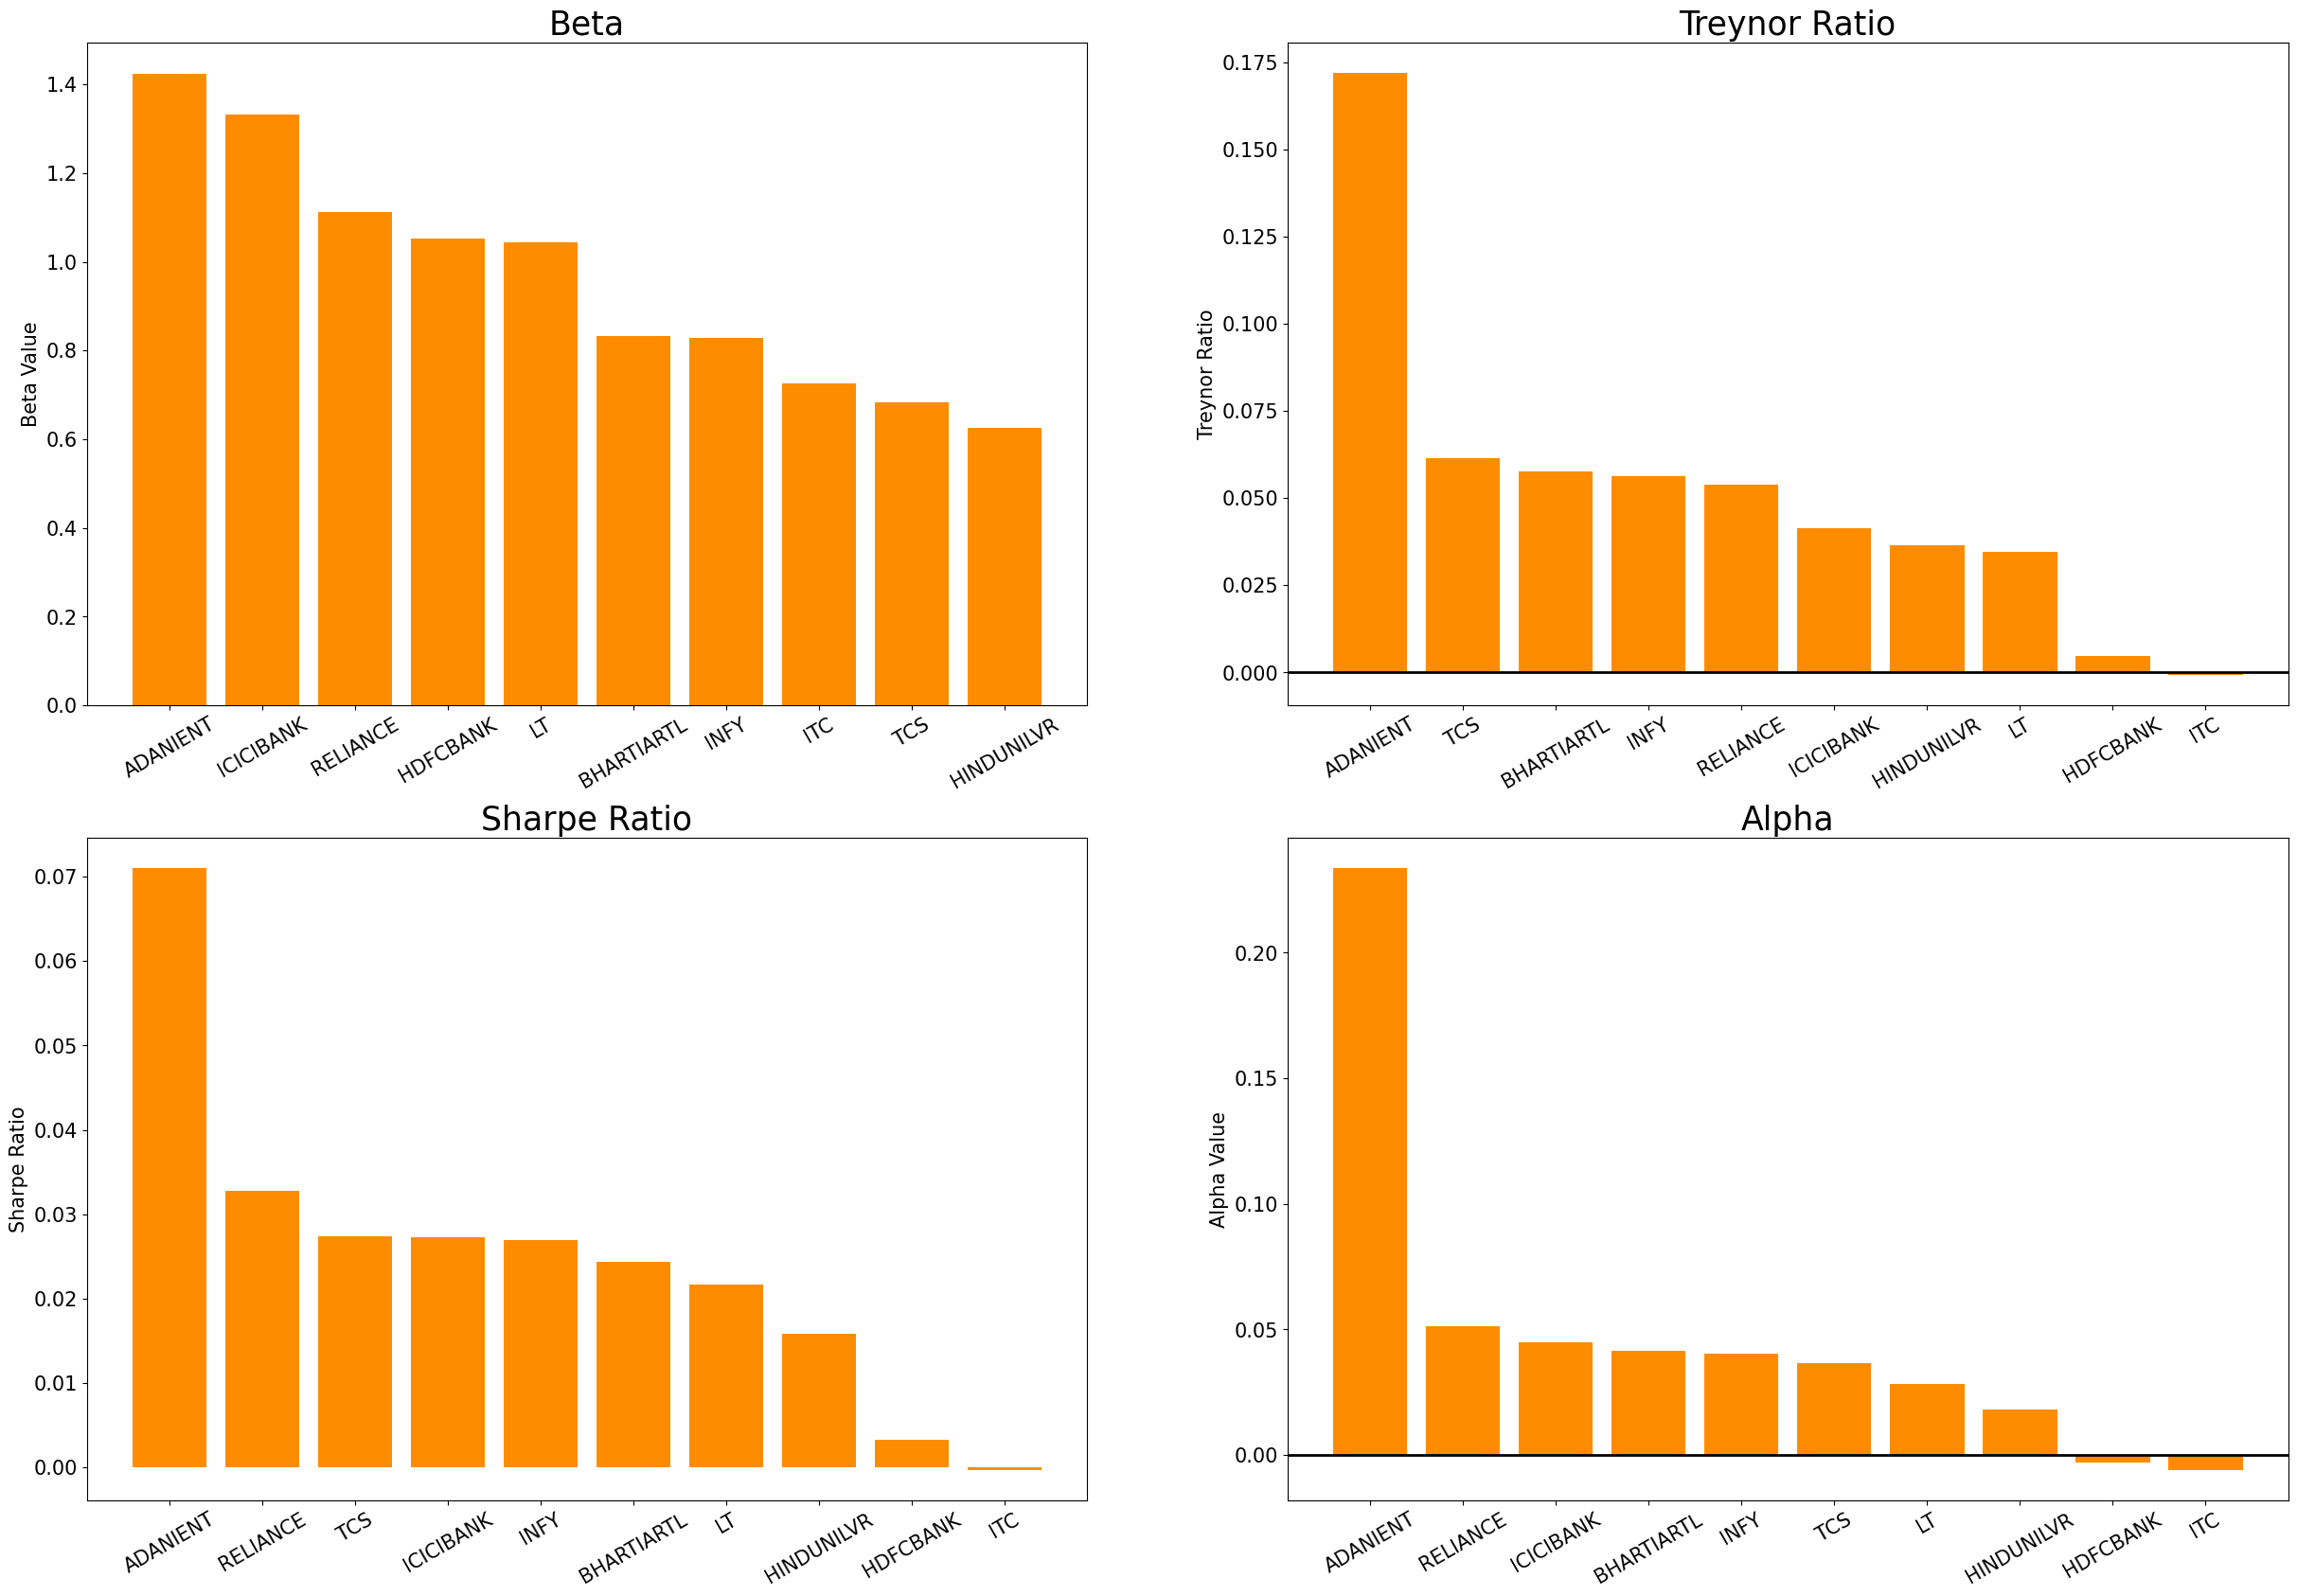

In [24]:
plt.figure(figsize=(30, 20))

plt.subplot(2,2,1)
plt.bar(beta_data.index, beta_data, color='Darkorange')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Beta Value', fontsize=15)
plt.title('Beta', fontsize=25)
plt.xticks(rotation=30)

plt.subplot(2,2,2)
plt.bar(treynor_ratio_data.index, treynor_ratio_data, color='Darkorange')
plt.axhline(y=0, color='black', linestyle='-', linewidth=2)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Treynor Ratio', fontsize=15)
plt.title('Treynor Ratio', fontsize=25)
plt.xticks(rotation=30)

plt.subplot(2,2,3)
plt.bar(sharpe_ratio_data.index, sharpe_ratio_data, color='Darkorange')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Sharpe Ratio', fontsize=15)
plt.title('Sharpe Ratio', fontsize=25)
plt.xticks(rotation=30)

plt.subplot(2,2,4)
plt.bar(alpha_data.index, alpha_data, color='Darkorange')
plt.axhline(y=0, color='black', linestyle='-', linewidth=2)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Alpha Value', fontsize=15)
plt.title('Alpha', fontsize=25)
plt.xticks(rotation=30)

plt.show()

* Each individual stock has comparable Sharpe Ratio
* **Adani Enterprise** has much higher value of Treynor Ratio and Alpha as compared to other stocks
* **ITC** has negative value of Treynor Ratio and Alpha

## Setting up Data for Simulation

In [25]:
ticker_list = [HDFCBANK, ICICIBANK, TCS, INFY, HINDUNILVR, ITC, RELIANCE, LT, ADANIENT, BHARTIARTL]
symbols = ['HDFCBANK', 'ICICIBANK', 'TCS', 'INFY', 'HINDUNILVR', 'ITC', 'RELIANCE', 'LT', 'ADANIENT', 'BHARTIARTL']

dfs = []

start_date = '2017-04-01'

for itr, ticker_data in enumerate(ticker_list):
    ticker_data['Symbol'] = symbols[itr]
    ticker_data.reset_index(inplace=True)
    dfs.append(ticker_data)

stock_data = pd.concat(dfs, ignore_index=True)
stock_data

,Date,Open,High,Low,Close,Adj Close,Volume,Return,Symbol
0,2017-04-03,723.000000,725.049988,713.000000,716.599976,682.544434,2074526,NaN,HDFCBANK
1,2017-04-05,717.625000,723.250000,713.775024,716.174988,682.139709,2872040,-0.059296,HDFCBANK
2,2017-04-06,715.750000,721.500000,712.525024,719.250000,685.068542,3062208,0.429360,HDFCBANK
3,2017-04-07,715.525024,722.500000,714.299988,719.424988,685.235291,2324180,0.024340,HDFCBANK
4,2017-04-10,721.500000,721.500000,716.325012,717.075012,682.997009,1696938,-0.326644,HDFCBANK
...,...,...,...,...,...,...,...,...,...
17035,2024-02-16,1124.000000,1127.050049,1116.849976,1120.000000,1120.000000,3091952,-0.062457,BHARTIARTL
17036,2024-02-19,1121.050049,1145.000000,1118.349976,1142.199951,1142.199951,4711035,1.982138,BHARTIARTL
17037,2024-02-20,1145.000000,1151.599976,1135.000000,1143.949951,1143.949951,5397418,0.153213,BHARTIARTL
17038,2024-02-21,1155.000000,1159.150024,1132.599976,1139.900024,1139.900024,4570259,-0.354030,BHARTIARTL


In [26]:
symbol_order = stock_data['Symbol'].unique()
price_data = stock_data.pivot(index='Date', columns='Symbol', values='Return')[symbol_order]

In [27]:
display(price_data)

Symbol,HDFCBANK,ICICIBANK,TCS,INFY,HINDUNILVR,ITC,RELIANCE,LT,ADANIENT,BHARTIARTL
Date,,,,,,,,,,
2017-04-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-04-05,-0.059296,-0.645254,-0.433329,-1.273791,1.596704,-0.923461,2.935281,2.134260,2.504467,0.789943
2017-04-06,0.429360,-1.404256,-0.049999,0.366484,-0.074832,-1.738664,1.660781,-0.781039,1.003496,-0.783752
2017-04-07,0.024340,-1.246217,1.208366,-1.805724,-1.085969,-0.529007,-2.217607,0.136663,1.425482,0.848444
2017-04-10,-0.326644,0.108165,-0.279955,-2.867903,0.156832,0.330086,-1.795099,-0.679356,2.299837,0.290127
...,...,...,...,...,...,...,...,...,...,...
2024-02-16,0.413704,0.649189,0.611708,1.509234,1.037918,0.173313,-0.681696,2.619457,0.933059,-0.062457
2024-02-19,-0.197200,2.003420,-0.593465,-0.111658,0.500996,1.149282,0.919162,-1.384806,1.091945,1.982138
2024-02-20,2.625085,0.479042,-1.782492,-0.853067,0.710060,-0.769699,-0.201830,0.506008,-0.926720,0.153213


Text(0.5, 36.72222222222221, '')

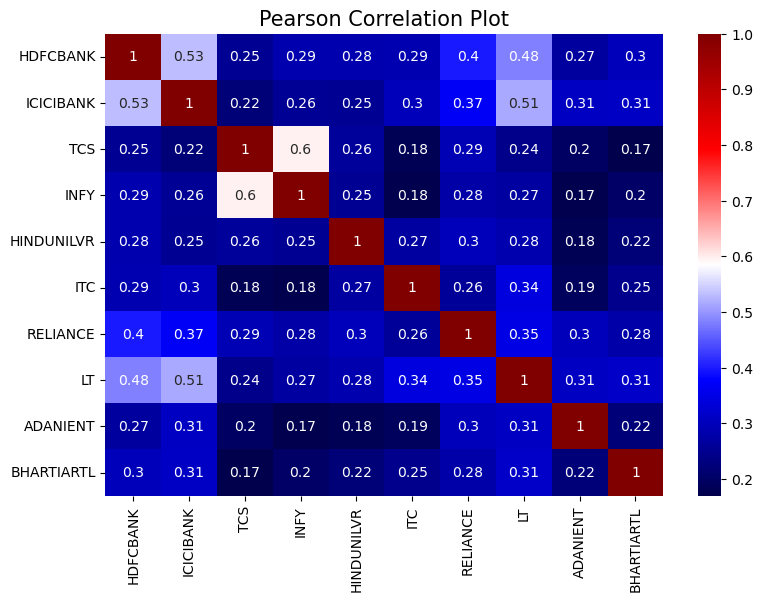

In [28]:
plt.figure(figsize=(9,6))

sns.heatmap(price_data.corr(), annot=True, cmap='seismic')
plt.title('Pearson Correlation Plot', fontsize=15)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.ylabel('')
plt.xlabel('')

* None of the Stocks have high correlation with each other which suggests our stocks choice is good

## Sharpe Ratio Calculation
The Sharpe ratio compares the return of an investment with its risk. It's a mathematical expression of the insight that excess returns over a period of time may signify more volatility and risk, rather than investing skill.

$$  Sharpe Ratio =  \frac {Rp - Rf} {\sigma p}   $$

Where: 
* Rp = Return of Portfolio (expected)
* Rf = Risk-Free Rate
* $\sigma$p = Standard Deviation of the Portfolio’s Excess Return


$$$$

**Expected Return:**
<div style="text-align: center;">
  \( R_p = ( w_{1}r_{1} + w_{2}r_{2} + \ldots +  w_{n}r_{n} ) \)
</div>

Where:
* $r_i$ = Return of Security i
* $w_i$ = Weight of Security i

$$$$

**Standard Deviation of the Portfolio**
$$ \sigma p = \sqrt{\sum{(w_i^2 \cdot \sigma_i^2) + (w_j^2 \cdot \sigma_j^2)} + 2 \sum{(w_i \cdot w_j \cdot \rho_{ij} \cdot \sigma_i \cdot \sigma_j)}}
$$

Where:

- w<sub>i</sub> is the weight of asset `i` in the portfolio.
- $\sigma_i$ is the standard deviation of asset `i`.
- $\rho_{ij}$ is the correlation coefficient between assets `i` and `j`.
- The first summation term calculates the contribution of each asset's risk to the portfolio.
- The second summation term considers the covariance between asset pairs `i` and `j` and their weights.


## Portfolio Optimization Process

In [78]:
beta_values = pd.Series([HDFCBANK_beta, ICICIBANK_beta, TCS_beta, INFY_beta, HINDUNILVR_beta, 
                      ITC_beta, RELIANCE_beta, LT_beta, ADANIENT_beta, BHARTIARTL_beta], 
                     index=['HDFCBANK', 'ICICIBANK', 'TCS', 'INFY', 'HINDUNILVR', 
                            'ITC', 'RE`LIANCE', 'LT', 'ADANIENT', 'BHARTIARTL'])
market_return = NSE['Return'].mean()

### Monte Carlo Simulation

In [79]:
num_portfolios = 100000

results = np.zeros((num_portfolios, 4 + len(price_data.columns)))  # Mean return, Volatility, Treynor Ratio, Sharpe Ratio, Portfolio Weights

for i in range(num_portfolios):
    
    weights = np.random.random(len(price_data.columns))    # Generate random portfolio weights
    weights /= np.sum(weights)                                # Normalize weights

    # portfolio statistics
    portfolio_return = np.sum(price_data.mean() * weights) * 252
    portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(price_data.cov() * 252, weights)))
    portfolio_beta = np.sum(beta_values * weights) * 252
    portfolio_alpha = portfolio_return - (risk_free_rate + portfolio_beta * (market_return - risk_free_rate))
    treynor_ratio =(portfolio_return - risk_free_rate) / portfolio_beta
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_std_dev
    
    

    # results
    results[i, :4] = [portfolio_return, portfolio_std_dev, treynor_ratio, sharpe_ratio]
    results[i, 4:] = weights

columns = ['Return', 'Volatility', 'Treynor Ratio', 'Sharpe Ratio'] + [stocks for stocks in price_data.columns]
results_df = pd.DataFrame(results, columns=columns)

max_treynor_portfolio = results_df.iloc[results_df['Treynor Ratio'].idxmax()]
max_sharpe_portfolio = results_df.iloc[results_df['Sharpe Ratio'].idxmax()]
min_volatility_portfolio = results_df.iloc[results_df['Volatility'].idxmin()]

In [80]:
results_df

,Return,Volatility,Treynor Ratio,Sharpe Ratio,HDFCBANK,ICICIBANK,TCS,INFY,HINDUNILVR,ITC,RELIANCE,LT,ADANIENT,BHARTIARTL
0,29.914736,19.497326,0.122463,1.531735,0.144734,0.033928,0.053084,0.149986,0.135220,0.000469,0.021192,0.104131,0.160862,0.196394
1,21.322459,17.061216,0.093622,1.246831,0.121932,0.161850,0.193740,0.130486,0.030944,0.197370,0.037504,0.007923,0.010633,0.107617
2,26.735110,17.705586,0.111551,1.507158,0.039938,0.092029,0.091060,0.114550,0.118399,0.110136,0.135357,0.100073,0.090457,0.108000
3,26.834502,18.158474,0.108178,1.475041,0.011861,0.129465,0.101241,0.138948,0.102066,0.070234,0.187287,0.149132,0.073293,0.036473
4,32.718692,20.288027,0.131944,1.610245,0.014302,0.104156,0.065484,0.218250,0.128839,0.025996,0.060643,0.037642,0.186311,0.158377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,28.772714,19.681308,0.109561,1.459390,0.034905,0.175760,0.052387,0.004777,0.099017,0.092504,0.160552,0.162805,0.120985,0.096307
99996,27.544790,18.424841,0.111890,1.492267,0.172656,0.026569,0.046206,0.118334,0.101505,0.065181,0.137269,0.076406,0.122036,0.133838
99997,29.169537,19.291988,0.115334,1.509411,0.078944,0.112752,0.084194,0.115545,0.009933,0.159292,0.094153,0.071753,0.146191,0.127244
99998,24.615661,18.486319,0.096992,1.328856,0.205606,0.073790,0.019923,0.113064,0.022030,0.050047,0.148384,0.135780,0.056593,0.174783


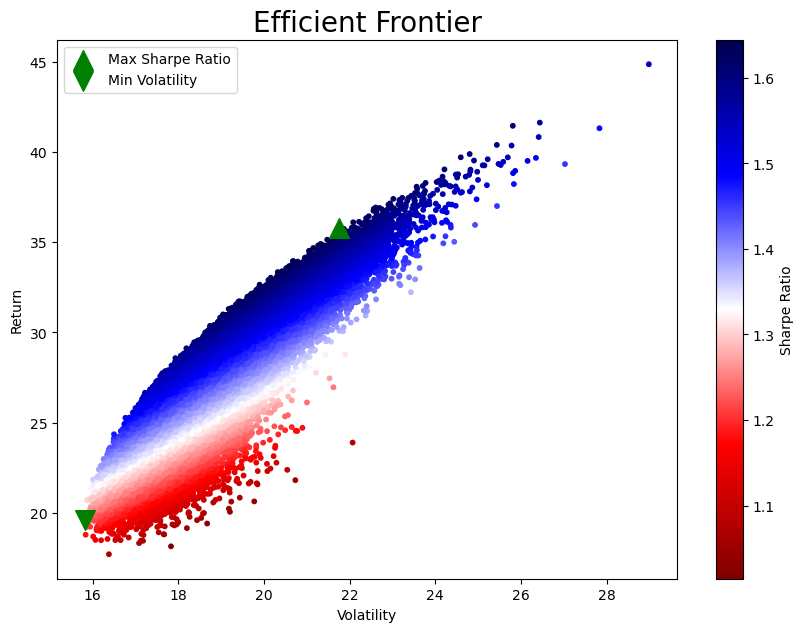

In [81]:
plt.figure(figsize=(10,7))

plt.scatter(results_df['Volatility'], results_df['Return'], c=results_df['Sharpe Ratio'], 
            cmap='seismic_r', marker='o', s=10)
plt.colorbar(label='Sharpe Ratio')


plt.scatter(max_sharpe_portfolio['Volatility'], max_sharpe_portfolio['Return'], 
            marker='^', color='g', s=200, label='Max Sharpe Ratio')

plt.scatter(min_volatility_portfolio['Volatility'], min_volatility_portfolio['Return'], 
            marker='v', color='g', s=200, label='Min Volatility')

plt.xlabel('Volatility')
plt.ylabel('Return')
plt.legend()
plt.title('Efficient Frontier', fontsize=20)
plt.show()

In [82]:
max_sharpe_portfolio 

Return           35.821028
Volatility       21.750620
Treynor Ratio     0.150107
Sharpe Ratio      1.644598
HDFCBANK          0.018530
ICICIBANK         0.021222
TCS               0.234226
INFY              0.107535
HINDUNILVR        0.174019
ITC               0.014738
RELIANCE          0.048573
LT                0.021473
ADANIENT          0.260063
BHARTIARTL        0.099621
Name: 2554, dtype: float64

In [83]:
max_treynor_portfolio 

Return           44.879240
Volatility       28.983087
Treynor Ratio     0.157427
Sharpe Ratio      1.546738
HDFCBANK          0.001598
ICICIBANK         0.002518
TCS               0.105589
INFY              0.023898
HINDUNILVR        0.014181
ITC               0.060998
RELIANCE          0.115483
LT                0.164470
ADANIENT          0.430814
BHARTIARTL        0.080451
Name: 31597, dtype: float64

In [84]:
min_volatility_portfolio

Return           19.623987
Volatility       15.827789
Treynor Ratio     0.096400
Sharpe Ratio      1.236685
HDFCBANK          0.091660
ICICIBANK         0.036916
TCS               0.197848
INFY              0.079378
HINDUNILVR        0.206656
ITC               0.210457
RELIANCE          0.025078
LT                0.092858
ADANIENT          0.005586
BHARTIARTL        0.053563
Name: 61188, dtype: float64

## Risk Metrics

### 1. Max Sharpe Ratio Portfolio

In [97]:
max_sharpe_weights = max_sharpe_portfolio[4:]

portfolio_return = np.sum(price_data.mean() * max_sharpe_weights)
beta_portfolio = np.sum(beta_values*max_sharpe_weights)
alpha_portfolio = portfolio_return - (risk_free_rate + beta_portfolio * (NSE['Return'].mean() - risk_free_rate))


print('Portfolio Return: ', portfolio_return)
print('Beta of Portfolio: ', beta_portfolio)
print('Alpha of Portfolio: ', alpha_portfolio)

Portfolio Return:  0.14214693488898417
Beta of Portfolio:  0.8916184824526802
Alpha of Portfolio:  0.085290960348366


### 2. Max Treynor Ratio Portfolio

In [98]:
max_treynor_weights = max_treynor_portfolio[4:]

portfolio_return = np.sum(price_data.mean() * max_treynor_weights)
beta_portfolio = np.sum(beta_values*max_treynor_weights)
alpha_portfolio = portfolio_return - (risk_free_rate + beta_portfolio * (NSE['Return'].mean() - risk_free_rate))


print('Portfolio Return: ', portfolio_return)
print('Beta of Portfolio: ', beta_portfolio)
print('Alpha of Portfolio: ', alpha_portfolio)

Portfolio Return:  0.17809222050318899
Beta of Portfolio:  1.0015546346660908
Alpha of Portfolio:  0.12039090742876732


### 3. Min Volatility Portfolio

In [99]:
max_sharpe_weights = min_volatility_portfolio[4:]

portfolio_return = np.sum(price_data.mean() * max_sharpe_weights)
beta_portfolio = np.sum(beta_values*max_sharpe_weights)
treynor_portfolio = (portfolio_return-risk_free_rate)/ beta_portfolio
alpha_portfolio = portfolio_return - (risk_free_rate + beta_portfolio * (NSE['Return'].mean() - risk_free_rate))


print('Portfolio Return: ', portfolio_return)
print('Treynor Ratio: ', treynor_portfolio)
print('Alpha of Portfolio: ', alpha_portfolio)

Portfolio Return:  0.07787296437285755
Treynor Ratio:  0.03583309663129475
Alpha of Portfolio:  0.021891755723089955


# Final Results

In [100]:
amount = 10000

In [101]:
monte_carlo_amount_distribution = max_sharpe_weights * amount
monte_carlo_amount_distribution

HDFCBANK       916.603141
ICICIBANK      369.163463
TCS           1978.481184
INFY           793.777093
HINDUNILVR    2066.556411
ITC           2104.568205
RELIANCE       250.784648
LT             928.580743
ADANIENT        55.859083
BHARTIARTL     535.626029
Name: 61188, dtype: float64

## Convert to Pickle

In [102]:
import pickle

In [103]:
pickle.dump(max_sharpe_weights, open('final_allocation.pkl','wb'))

In [104]:
logo_list = ['HDFCBANK', 'ICICIBANK', 'TCS', 'INFY', 'HINDUNILVR', 'ITC', 'RELIANCE', 'LT', 'ADANIENT', 'BHARTIARTL']
pickle.dump(logo_list, open('logo_list.pkl','wb'))